**# Introduction**

* The next project is based on the kaggle dataset "Logistic regression To predict heart disease" and you can find it in this [link](https://www.kaggle.com/dileep070/heart-disease-prediction-using-logistic-regression)

* The goal of this project is to have a better understanding on the factors that rise the probability of heart disease.

* The features are correctly described in the kaggle dataset.

* We will use some Logistic models in order to predict the probability of have heart problems.

#Let's import our libraries


In [210]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt


Let's collect the data from kaggle


In [211]:
!pip install -q kaggle

n
n

n
n


In [212]:
#Choice our kaggle.json downloaded file
from google.colab import files
files.upload()

#Make directory named kaggle and copy kaggle.json file there.
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/


Saving kaggle.json to kaggle (2).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [213]:
 ! chmod 600 ~/.kaggle/kaggle.json #Change the permissions of the file.n

In [214]:
! kaggle datasets list #- That's all ! You can check if everything's okay by running this command.

401 - Unauthorized


In [215]:

! kaggle datasets download -d dileep070/heart-disease-prediction-using-logistic-regression

! mkdir Logistic_reg_heart_disease_project_dataset
#! cp heart-disease-prediction-using-logistic-regression.zip /Logistic_reg_heart_disease_project_datase/
! unzip heart-disease-prediction-using-logistic-regression.zip -d Logistic_reg_heart_disease_project_dataset


401 - Unauthorized
mkdir: cannot create directory ‘Logistic_reg_heart_disease_project_dataset’: File exists
Archive:  heart-disease-prediction-using-logistic-regression.zip
replace Logistic_reg_heart_disease_project_dataset/framingham.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [216]:
!echo $PATH
!ls

/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/opt/bin

 heart-disease-prediction-using-logistic-regression.zip
'kaggle (1).json'
'kaggle (2).json'
 kaggle.json
 Logistic_reg_heart_disease_project_dataset
 sample_data


In [217]:
!cd Logistic_reg_heart_disease_project_dataset

In [218]:
!ls Logistic_reg_heart_disease_project_dataset



framingham.csv


In [219]:
path = 'Logistic_reg_heart_disease_project_dataset/framingham.csv'

In [220]:
#Reading the saved dataset
dataset = pd.read_csv(path)


In [221]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


* # Data Cleaning 

* Let's see correlations between our features, this could help us with the data cleaning process.

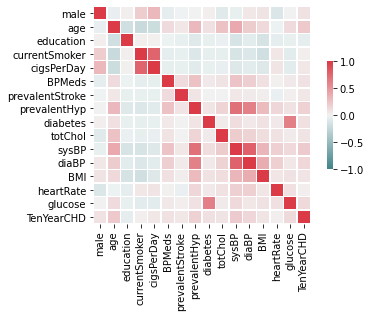

In [222]:
#See correlations 
cmap = sns.diverging_palette(200,10,as_cmap=True)
sns.heatmap(dataset.corr(), vmax=1,vmin=-1, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Since we don't have info about what "education" feature is about, I'll delete it from our dataset.

In [223]:
dataset = dataset.drop(["education"], axis=1)

In [224]:
dataset.shape

(4238, 15)

## Let's Take Care of the cigsPerDay feature
* For this feature we'll set the instance to 0.0 if the person is not a current smoker (currentSmoker == 0), otherwise, the instance will be set to 20.0 (the most common value) 


In [225]:
#Fill our missing data with 20.0
#we'll take care of the values where the person is a currentSmoker later
dataset['cigsPerDay'] = dataset['cigsPerDay'].fillna(20.0)


In [226]:
dataset['cigsPerDay'].describe()

count    4238.000000
mean        9.078339
std        11.913780
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        70.000000
Name: cigsPerDay, dtype: float64

In [227]:
#If our the instance is a currentSmoker, fill the cigsPerDay with a 0
dataset['cigsPerDay'] = dataset.apply(lambda x: 0.0 if x["currentSmoker"]==0 else x['cigsPerDay'], axis=1)

In [228]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   currentSmoker    4238 non-null   int64  
 3   cigsPerDay       4238 non-null   float64
 4   BPMeds           4185 non-null   float64
 5   prevalentStroke  4238 non-null   int64  
 6   prevalentHyp     4238 non-null   int64  
 7   diabetes         4238 non-null   int64  
 8   totChol          4188 non-null   float64
 9   sysBP            4238 non-null   float64
 10  diaBP            4238 non-null   float64
 11  BMI              4219 non-null   float64
 12  heartRate        4237 non-null   float64
 13  glucose          3850 non-null   float64
 14  TenYearCHD       4238 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 496.8 KB


## Let's take Care of the BPMeds missing values

In [229]:
from sklearn.impute import SimpleImputer

In [230]:
BPMeds_imputer = SimpleImputer(strategy='constant', fill_value=0)

In [231]:
dataset['BPMeds'] = BPMeds_imputer.fit_transform(dataset['BPMeds'].values.reshape(-1, 1))

In [232]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   currentSmoker    4238 non-null   int64  
 3   cigsPerDay       4238 non-null   float64
 4   BPMeds           4238 non-null   float64
 5   prevalentStroke  4238 non-null   int64  
 6   prevalentHyp     4238 non-null   int64  
 7   diabetes         4238 non-null   int64  
 8   totChol          4188 non-null   float64
 9   sysBP            4238 non-null   float64
 10  diaBP            4238 non-null   float64
 11  BMI              4219 non-null   float64
 12  heartRate        4237 non-null   float64
 13  glucose          3850 non-null   float64
 14  TenYearCHD       4238 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 496.8 KB


## Taking care of the totChol missing values

In [233]:
TotChol_imputer = SimpleImputer(strategy='mean')

In [234]:
dataset['totChol'] = TotChol_imputer.fit_transform(dataset['totChol'].values.reshape(-1, 1))

In [235]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   currentSmoker    4238 non-null   int64  
 3   cigsPerDay       4238 non-null   float64
 4   BPMeds           4238 non-null   float64
 5   prevalentStroke  4238 non-null   int64  
 6   prevalentHyp     4238 non-null   int64  
 7   diabetes         4238 non-null   int64  
 8   totChol          4238 non-null   float64
 9   sysBP            4238 non-null   float64
 10  diaBP            4238 non-null   float64
 11  BMI              4219 non-null   float64
 12  heartRate        4237 non-null   float64
 13  glucose          3850 non-null   float64
 14  TenYearCHD       4238 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 496.8 KB


## Taking care of the BMI missing values

In [236]:
BMI_imputer = SimpleImputer(strategy='mean')
dataset['BMI'] = BMI_imputer.fit_transform(dataset['BMI'].values.reshape(-1, 1))

In [237]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   currentSmoker    4238 non-null   int64  
 3   cigsPerDay       4238 non-null   float64
 4   BPMeds           4238 non-null   float64
 5   prevalentStroke  4238 non-null   int64  
 6   prevalentHyp     4238 non-null   int64  
 7   diabetes         4238 non-null   int64  
 8   totChol          4238 non-null   float64
 9   sysBP            4238 non-null   float64
 10  diaBP            4238 non-null   float64
 11  BMI              4238 non-null   float64
 12  heartRate        4237 non-null   float64
 13  glucose          3850 non-null   float64
 14  TenYearCHD       4238 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 496.8 KB


## Using the same imputer for heartRate and glucose.


In [238]:
dataset['heartRate'] = BMI_imputer.fit_transform(dataset['heartRate'].values.reshape(-1, 1))
dataset['glucose'] = BMI_imputer.fit_transform(dataset['glucose'].values.reshape(-1, 1))

In [239]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   currentSmoker    4238 non-null   int64  
 3   cigsPerDay       4238 non-null   float64
 4   BPMeds           4238 non-null   float64
 5   prevalentStroke  4238 non-null   int64  
 6   prevalentHyp     4238 non-null   int64  
 7   diabetes         4238 non-null   int64  
 8   totChol          4238 non-null   float64
 9   sysBP            4238 non-null   float64
 10  diaBP            4238 non-null   float64
 11  BMI              4238 non-null   float64
 12  heartRate        4238 non-null   float64
 13  glucose          4238 non-null   float64
 14  TenYearCHD       4238 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 496.8 KB


# Let's Use Seaborn to do the Exploratory Data Analysis (EDA) 

* Let's see how features are correlated again


In [240]:
dataset.corr()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.028979,0.197596,0.316571,-0.051545,-0.004546,0.005313,0.015708,-0.069974,-0.035989,0.057933,0.081506,-0.116601,0.005818,0.088428
age,-0.028979,1.000000,-0.213748,-0.191985,0.120955,0.057655,0.307194,0.101258,0.260270,0.394302,0.206104,0.135283,-0.012819,0.116850,0.225256
currentSmoker,0.197596,-0.213748,1.000000,0.771138,-0.048358,-0.032988,-0.103260,-0.044295,-0.046285,-0.130230,-0.107746,-0.167276,0.062348,-0.054157,0.019456
cigsPerDay,0.316571,-0.191985,0.771138,1.000000,-0.046627,-0.033098,-0.066700,-0.037982,-0.024922,-0.088196,-0.055732,-0.092112,0.075657,-0.055106,0.056147
BPMeds,-0.051545,0.120955,-0.048358,-0.046627,1.000000,0.114609,0.258697,0.051394,0.078712,0.251503,0.192356,0.099647,0.015139,0.048856,0.086417
prevalentStroke,-0.004546,0.057655,-0.032988,-0.033098,0.114609,1.000000,0.074830,0.006949,0.000067,0.057009,0.045190,0.024840,-0.017676,0.018055,0.061810
prevalentHyp,0.005313,0.307194,-0.103260,-0.066700,0.258697,0.074830,1.000000,0.077808,0.163041,0.696755,0.615751,0.300572,0.147222,0.082924,0.177603
diabetes,0.015708,0.101258,-0.044295,-0.037982,0.051394,0.006949,0.077808,1.000000,0.040092,0.111283,0.050329,0.086250,0.048993,0.605705,0.097317
totChol,-0.069974,0.260270,-0.046285,-0.024922,0.078712,0.000067,0.163041,0.040092,1.000000,0.207609,0.163903,0.114789,0.090676,0.044583,0.081624
sysBP,-0.035989,0.394302,-0.130230,-0.088196,0.251503,0.057009,0.696755,0.111283,0.207609,1.000000,0.784002,0.325247,0.182174,0.134608,0.216429


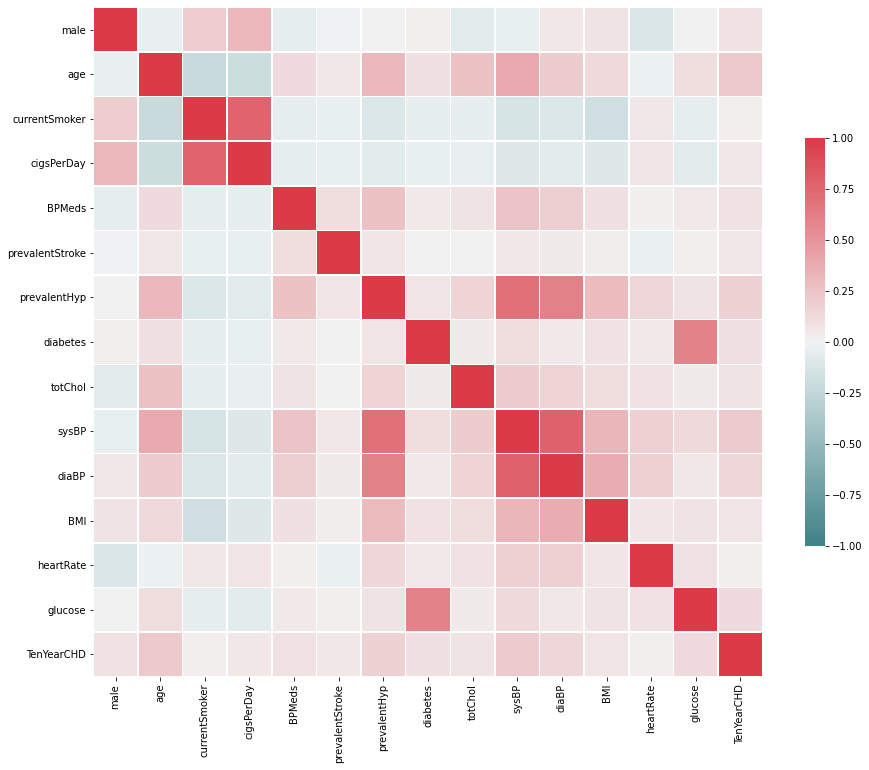

In [241]:
#See correlations 
plt.figure(figsize=(15,15))
cmap = sns.diverging_palette(200,10,as_cmap=True)
sns.heatmap(dataset.corr(), vmax=1,vmin=-1, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

We can see that the most correlated features with out label (TenYearCHD) are:
*   age
*   prevalentHyp
*   sysBP
*   diaBP
*   glucose

In [242]:
dataset.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,0.494101,9.078339,0.029259,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,0.500024,11.913780,0.168552,0.076587,0.462763,0.158316,44.326453,22.038097,11.910850,4.070953,12.025177,22.836603,0.359023
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


Now let's do some boxplots

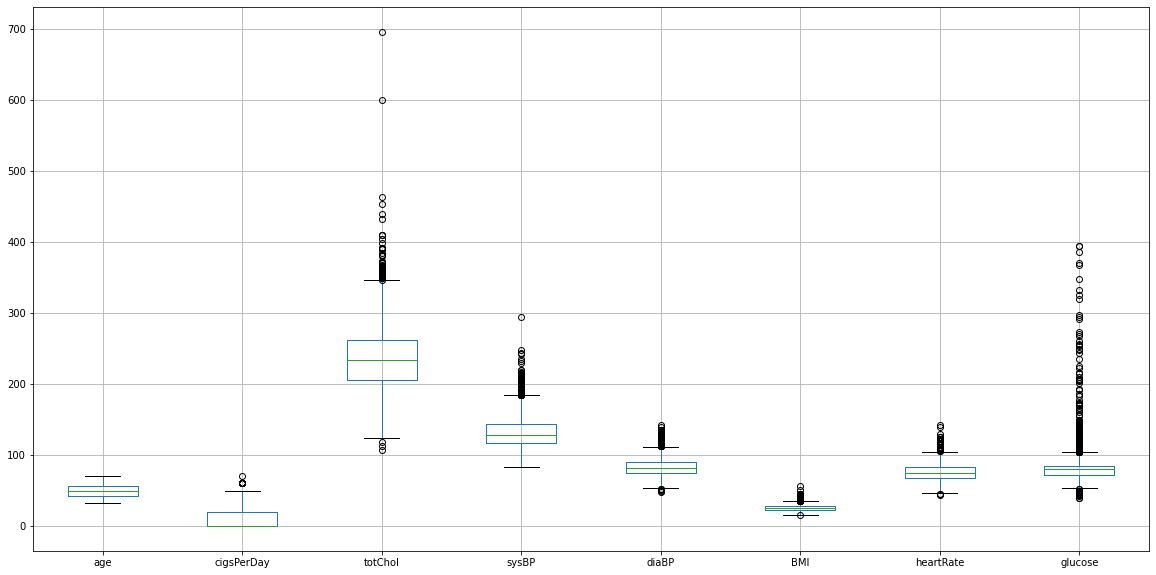

In [243]:
plt.figure(figsize=(20,10))
dataset.boxplot(column=["age", "cigsPerDay", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose"])

## Insigts:
*   age and cigsPerDay a little bit of outliers
*   totChol, sysBP, diaBP, BMI, heartRate and glucose have many outliers
*   Our features have very different scales (we will scale our features)



Before scale our features, let's do some barplots


<Figure size 1440x1440 with 0 Axes>

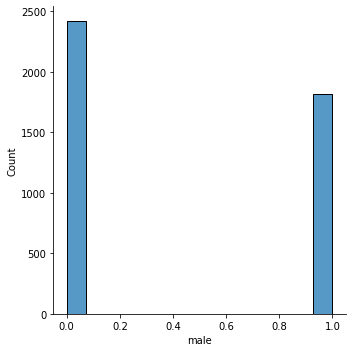

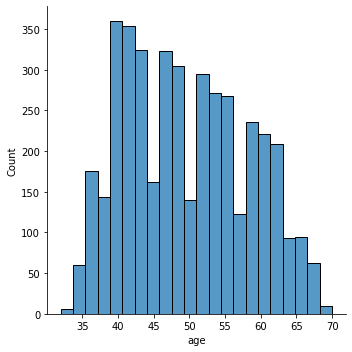

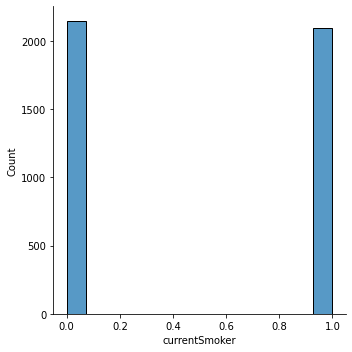

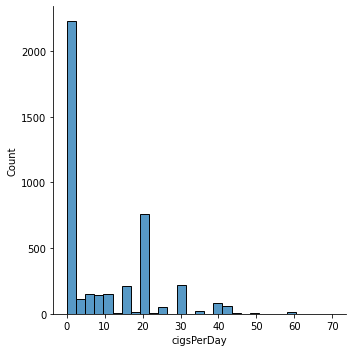

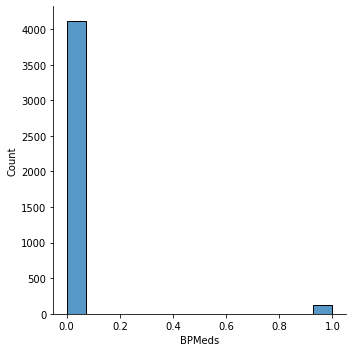

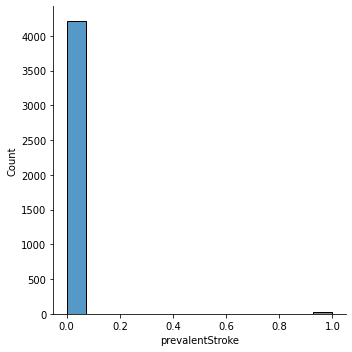

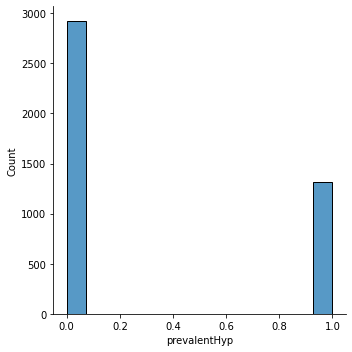

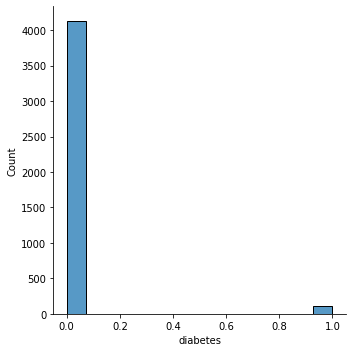

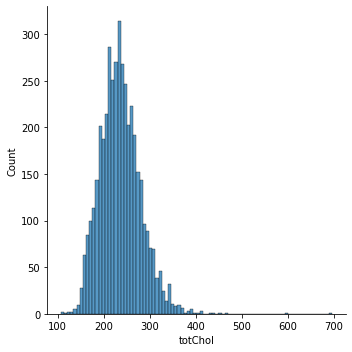

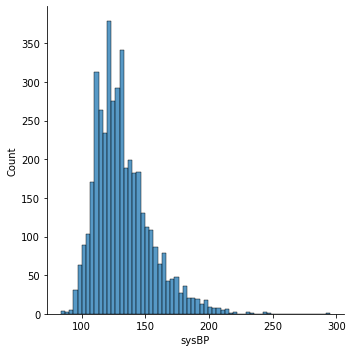

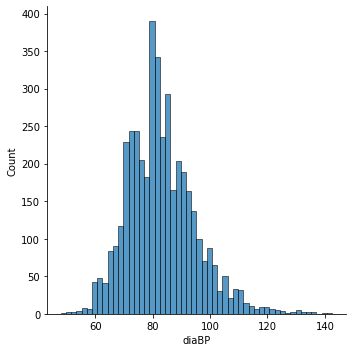

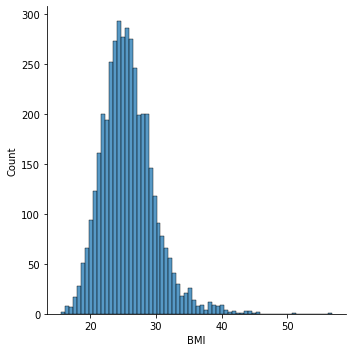

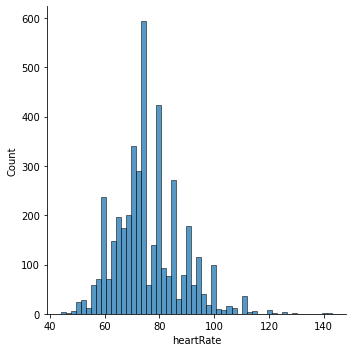

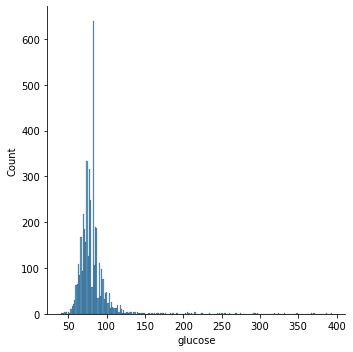

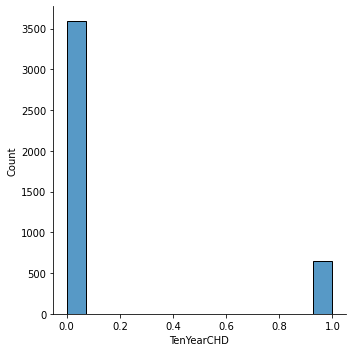

In [244]:
plt.figure(figsize=(20,20))
for column in dataset.columns:
  sns.displot(dataset[column])

## insights of the dataset:
*  There is some bias on BPMeds, prevalentStroke and diabetes features, most of the patients had not any of this problems.

* The number of male/famele patients and current/not current smoker are similar, which is fine.

* The other features are well distributed, we just need to do some feature scaling.

# Feature Scaling
* This time we will use Standaritation since we have a lot of outliers (normalitation is highly affected by outliers).

In [245]:
from sklearn.preprocessing import StandardScaler


In [246]:
scaler = StandardScaler()

* Before scale our features, let's split our dataset into out features (X) and our labels (y) and into our train, val and test sets

In [247]:
X = dataset.drop(labels = "TenYearCHD", axis=1)
y = dataset["TenYearCHD"]

In [248]:
from sklearn.model_selection import train_test_split

In [249]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

* Let's Scale our training set

In [250]:
X_train_val

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
3252,1,40,1,30.0,0.0,0,0,0,205.0,131.0,81.0,23.74,66.0,87.0
3946,0,57,0,0.0,0.0,0,1,0,250.0,152.5,92.5,32.31,75.0,94.0
1261,0,47,0,0.0,0.0,0,0,0,230.0,123.0,71.0,26.98,83.0,73.0
2536,1,41,1,30.0,0.0,0,0,0,228.0,113.0,82.5,25.67,67.0,70.0
4089,0,64,0,0.0,0.0,0,1,0,232.0,149.5,84.0,20.49,68.0,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,0,36,1,5.0,0.0,0,1,0,222.0,147.0,94.0,26.79,76.0,71.0
466,0,57,1,15.0,0.0,0,0,0,250.0,125.0,74.0,21.08,80.0,72.0
3092,0,60,0,0.0,0.0,0,1,0,298.0,133.0,89.0,25.09,83.0,81.0
3772,1,39,1,10.0,0.0,0,0,0,215.0,102.0,64.5,24.50,68.0,62.0


* Scale only the needed features.

In [251]:
X_train_val[["age", "cigsPerDay", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose"]] = scaler.fit_transform(X_train_val[["age", "cigsPerDay", "totChol", "sysBP", "diaBP", "BMI", "heartRate", "glucose"]])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [252]:
X_train_val.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,3390.000000,3.390000e+03,3390.000000,3.390000e+03,3390.000000,3390.000000,3390.000000,3390.000000,3.390000e+03,3.390000e+03,3.390000e+03,3.390000e+03,3.390000e+03,3.390000e+03
mean,0.422714,2.596415e-16,0.499115,3.092904e-16,0.029204,0.006195,0.313274,0.025074,-1.884432e-16,-1.426587e-16,-6.163212e-16,-9.052739e-16,3.624764e-16,-5.268238e-16
std,0.494064,1.000148e+00,0.500073,1.000148e+00,0.168401,0.078474,0.463893,0.156372,1.000148e+00,1.000148e+00,1.000148e+00,1.000148e+00,1.000148e+00,1.000148e+00
min,0.000000,-2.043179e+00,0.000000,-7.666685e-01,0.000000,0.000000,0.000000,0.000000,-2.920039e+00,-2.210567e+00,-2.923962e+00,-2.507742e+00,-2.597952e+00,-1.856802e+00
25%,0.000000,-8.771223e-01,0.000000,-7.666685e-01,0.000000,0.000000,0.000000,0.000000,-6.941720e-01,-6.958551e-01,-6.987246e-01,-6.692609e-01,-6.701617e-01,-4.419622e-01
50%,0.000000,-6.088261e-02,0.000000,-7.666685e-01,0.000000,0.000000,0.000000,0.000000,-6.463382e-02,-1.984871e-01,-8.234430e-02,-1.116290e-01,-8.344309e-02,-8.825222e-02
75%,1.000000,7.553571e-01,1.000000,9.116797e-01,0.000000,0.000000,1.000000,0.000000,5.817670e-01,5.249573e-01,5.862717e-01,5.233165e-01,5.870925e-01,1.328165e-01
max,1.000000,2.387837e+00,1.000000,4.268376e+00,1.000000,1.000000,1.000000,1.000000,1.032275e+01,7.352464e+00,4.765121e+00,7.539373e+00,5.616110e+00,1.379487e+01


## Let's Build our model!

In [253]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
# Build some dictionaries for measures

training_scores = pd.DataFrame(columns=["model", "accuracy_score", "recall_score", "true_negatives", "false_positives", "false_negatives", "true_positives"])
validation_scores = pd.DataFrame(columns=["model", "accuracy_score", "recall_score", "true_negatives", "false_positives", "false_negatives", "true_positives"])
test_scores  = pd.DataFrame(columns=["model", "accuracy_score", "recall_score", "true_negatives", "false_positives", "false_negatives", "true_positives"])

log_reg = LogisticRegression(penalty="l2",solver="lbfgs")

In [254]:
#Split training_val set to training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, train_size = 0.8, random_state = 42) 

In [255]:
#Training the model
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [256]:
log_reg.n_iter_

array([42], dtype=int32)

In [257]:
predictions_val = log_reg.predict(X_val)
predictions_train = log_reg.predict(X_train)

## Measuring accuracy preformance

In [258]:
from sklearn.metrics import accuracy_score
Logistic_regression_accuracy_train = accuracy_score(y_train, predictions_train)
Logistic_regression_accuracy_train


0.8558259587020649

## Measuring confusion matrix preformance

In [259]:
from sklearn.metrics import confusion_matrix
confusion_matrix_vanila_logistic = confusion_matrix(y_train, predictions_train)

## Let's set a treshold in order to improve our recall, doing this we'll predict most of the positive cases correctly.

* It is more important to have a high Recall instead of a high Precision because we need as more true positive instances as posible.

In [260]:
from sklearn.metrics import  precision_recall_curve

## Let's the behavior of the precision/recall depending of the threshold

In [261]:
def plot_Precision_Recall(y_train, predictions_train):
  precisions,recalls,thresholds = precision_recall_curve(y_train, predictions_train)
  print(f"Precisions: {precisions}")
  print(f"recalls: {recalls}")
  print(f"thresholds: {thresholds}")
  plt.figure(figsize=(14,6))
  plt.title("recall vs precision")
  plt.xlabel("Threshold")
  sns.lineplot(x=thresholds, y=precisions[:-1],label="Precision")
  sns.lineplot(x=thresholds, y=recalls[:-1], label="Recall")

Precisions: [0.15449853 0.73333333 1.        ]
recalls: [1.         0.10501193 0.        ]
thresholds: [0 1]


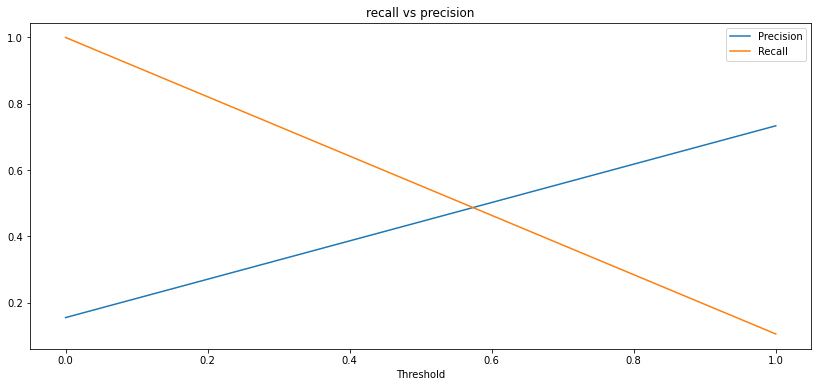

In [262]:
plot_Precision_Recall(y_train,predictions_train)

## with a threshold of 0.3 we have a good recall 

In [263]:
predictions_train_proba = log_reg.predict_proba(X_train)
predictions_train_proba

array([[0.67907812, 0.32092188],
       [0.77981161, 0.22018839],
       [0.90471924, 0.09528076],
       ...,
       [0.95454992, 0.04545008],
       [0.5733495 , 0.4266505 ],
       [0.52842725, 0.47157275]])

In [264]:
#By doing this, if the instance has a 30% or more chances to have a heart disease
# it will be take as a true case 
treshold = 0.30
actual_predictions_train = (predictions_train_proba[:,1] > treshold)
actual_predictions_train

array([ True, False, False, ..., False,  True,  True])

In [265]:
confusion_matrix_threshold_logistic =confusion_matrix(y_train, actual_predictions_train) #Now 129 of the positives are correctly predicted

## Let's see and save the recall score for both models

In [266]:
recall_logistic_vanilla = recall_score(y_train, predictions_train)
recall_logistic_thesholded = recall_score(y_train, actual_predictions_train)
recall_logistic_thesholded
Logistic_regression_threshold_accuracy_train = accuracy_score(y_train, actual_predictions_train)
Logistic_regression_threshold_accuracy_train

0.825589970501475

In [267]:
scores

,model,accuracy_score,recall_score,true_negatives,false_positives,false_negatives,true_positives


## Let's Try some more models, measuring them with confusion matrix and precision/recall

In [269]:
from sklearn.svm import SVC
svc = SVC(kernel="poly",degree=3, coef0=1, C=5,probability=True)

In [270]:
svc.fit(X_train, y_train)

SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [271]:
svc_predictions_train = svc.predict(X_train)
accuracy_score(y_train, svc_predictions_train)

0.8764749262536873

We have a much better accuracy!

In [272]:
confusion_matrix(y_train, svc_predictions_train)

array([[2288,    5],
       [ 330,   89]])

We have also a bigger number of true falses (2288 instead of 2277) and true positives (89 instead of 44) than the Logistic Classifier before setting a threshold.

So, we can have better predictions for the positive instances.
Not only because we have more true positives, but because this true positives are instances that have a bigger probability to have a heart disease, which means that we will have less false positives.


Precisions: [0.15449853 0.94680851 1.        ]
recalls: [1.        0.2124105 0.       ]
thresholds: [0 1]


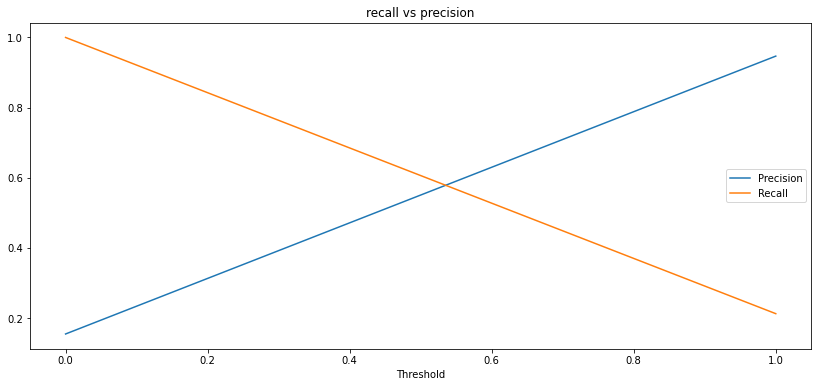

In [273]:
plot_Precision_Recall(y_train,svc_predictions_train)

In [274]:
svc_predictions_train_proba = svc.predict_proba(X_train)
svc_predictions_train_proba


array([[0.83048385, 0.16951615],
       [0.84847763, 0.15152237],
       [0.85599583, 0.14400417],
       ...,
       [0.86053278, 0.13946722],
       [0.84456762, 0.15543238],
       [0.77793991, 0.22206009]])

In [275]:
y_train

882     1
4231    0
2552    0
2376    0
1496    0
       ..
1962    0
2643    0
2689    0
212     0
3369    1
Name: TenYearCHD, Length: 2712, dtype: int64

Note: Need to see why this happends!

In [276]:
treshold_for_svc = 0.17
actual_predictions_train_svc = (svc_predictions_train_proba[:,1] > treshold_for_svc)
actual_predictions_train_svc

array([False, False, False, ..., False, False,  True])

In [277]:
confusion_matrix(y_train, actual_predictions_train_svc)


array([[2271,   22],
       [ 300,  119]])

The bad news is that if we set our threshold at 0.30, we will have a much better precision but a poor recall (which is the one we are interested in)

* Let's use the original svc model instead the set one

## Let's, Try the next models:
* Decision Tree
* Bagging/Pasting
* Random Forest



## Decision Tree


In [278]:
from sklearn.tree import DecisionTreeClassifier


In [279]:
tree_clf = DecisionTreeClassifier(max_depth=18)

In [280]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=18, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [281]:
predictions_train_tree = tree_clf.predict(X_train)
proba_predictions_tree = tree_clf.predict_proba(X_train)

In [282]:
proba_predictions_tree

array([[0.     , 1.     ],
       [0.96875, 0.03125],
       [0.25   , 0.75   ],
       ...,
       [1.     , 0.     ],
       [1.     , 0.     ],
       [0.     , 1.     ]])

In [283]:
y_train

882     1
4231    0
2552    0
2376    0
1496    0
       ..
1962    0
2643    0
2689    0
212     0
3369    1
Name: TenYearCHD, Length: 2712, dtype: int64

In [284]:
confusion_matrix(y_train, predictions_train_tree)

array([[2289,    4],
       [  57,  362]])

In [285]:
accuracy_score(y_train, predictions_train_tree)

0.9775073746312685

In [286]:
recall_score(y_train, predictions_train_tree)

0.863961813842482

This seems to be a perfect model... Let's see how well it generalize 

In [287]:
predictions_val_tree = tree_clf.predict(X_val)

In [288]:
confusion_matrix(y_val, predictions_val_tree)

array([[498,  79],
       [ 74,  27]])

In [289]:
accuracy_score(y_val, predictions_val_tree)

0.7743362831858407

## Let's do some grid search to find the optim parameters.

In [290]:
from sklearn.model_selection import GridSearchCV

In [291]:
grid_parameters = {
    'max_depth': [18],
    'max_features':[None],
    'max_leaf_nodes':[None],
    'min_samples_split':[2,10,20,30],
    'min_samples_leaf':[100,200,400]
}

In [292]:
tree_grid_clf = GridSearchCV(tree_clf,param_grid=grid_parameters,scoring="recall")

In [293]:
tree_grid_clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=18,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [18], 'max_features': [None],
         

In [294]:
tree_grid_clf.best_score_

0.0

In [295]:
tree_grid_predictions = tree_grid_clf.predict(X_train)

In [296]:
confusion_matrix(y_train, tree_grid_predictions)

array([[2293,    0],
       [ 419,    0]])

In [297]:
accuracy_score(y_train, tree_grid_predictions)

0.8455014749262537

## Bagging/Pasting for logistic regression

In [298]:
from sklearn.ensemble import BaggingClassifier


In [299]:
base_logistic_clf = LogisticRegression(penalty="l2",solver="lbfgs")
Bagging_clf = BaggingClassifier(base_logistic_clf,bootstrap=True)

#gridSearch to look for the optim num of estimators
params_grid = {
    "n_estimators" : [ 1,5,10,15,20,30,40,50,70,100]
}
bagging_clf_grid = GridSearchCV(Bagging_clf,params_grid)

In [300]:
bagging_clf_grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=BaggingClassifier(base_estimator=LogisticRegression(C=1.0,
                                                                           class_weight=None,
                                                                           dual=False,
                                                                           fit_intercept=True,
                                                                           intercept_scaling=1,
                                                                           l1_ratio=None,
                                                                           max_iter=100,
                                                                           multi_class='auto',
                                                                           n_jobs=None,
                                                                           penalty='l2',
                                                        

In [302]:
bagging_clf_grid.best_score_

0.8539880260681061

In [303]:
base_logistic_clf = LogisticRegression(penalty="l2",solver="lbfgs")
Pasting_clf = BaggingClassifier(base_logistic_clf,bootstrap = False)

#gridSearch to look for the optim num of estimators
params_grid = {
    "n_estimators" : [ 1,5,10,15,20,30,40,50,70,100]
}
Pasting_clf_grid = GridSearchCV(Bagging_clf,params_grid)

In [304]:
Pasting_clf_grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=BaggingClassifier(base_estimator=LogisticRegression(C=1.0,
                                                                           class_weight=None,
                                                                           dual=False,
                                                                           fit_intercept=True,
                                                                           intercept_scaling=1,
                                                                           l1_ratio=None,
                                                                           max_iter=100,
                                                                           multi_class='auto',
                                                                           n_jobs=None,
                                                                           penalty='l2',
                                                        

In [305]:
Pasting_clf_grid.best_estimator_

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='auto',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='lbfgs', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=20, n_jobs=None,
                  oob_score=False, random_state=None,

In [306]:
Pasting_clf_grid.best_score_

0.8536183428132624

* Pasting need less estimators than Bagging model.
* Bagging is a little bit more accurate.

## Let's Measure them using confusion matrix.

In [307]:
bagging_predictions_train = bagging_clf_grid.predict(X_train)
pasting_predictions_train = Pasting_clf_grid.predict(X_train)
print("Bagging confusion matrix: ")
print(confusion_matrix(y_train, bagging_predictions_train))
print("Pasting confusion matrix: ")
print(confusion_matrix(y_train, pasting_predictions_train))

Bagging confusion matrix: 
[[2272   21]
 [ 375   44]]
Pasting confusion matrix: 
[[2274   19]
 [ 376   43]]


## Let's see the recall socre

In [308]:
recall_socre_bagging_train = recall_score(y_train, bagging_predictions_train)
recall_score_pasting_train = recall_score(y_train, pasting_predictions_train)

print(f"Bagging recall score: {recall_socre_bagging_train}")
print(f"Pasting recall score: {recall_score_pasting_train}")

Bagging recall score: 0.10501193317422435
Pasting recall score: 0.1026252983293556


## Bagging/Pasting with SVC

* Bagging

In [313]:
base_svc = SVC(kernel="poly",degree=3, coef0=1, C=5,probability=True)

Bagging_clf_svc = BaggingClassifier(base_svc,bootstrap=True)

#gridSearch to look for the optim num of estimators
params_grid = {
    "n_estimators" : [ 1,5,10,15,20,30,40,50,70,100]
}
Bagging_clf_svc_grid = GridSearchCV(Bagging_clf_svc,params_grid)
Bagging_clf_svc_grid.fit(X_train, y_train)

KeyboardInterrupt: ignored

* Pasting

In [ ]:
base_svc = SVC(kernel="poly",degree=3, coef0=1, C=5,probability=True)

Pasting_clf_svc = BaggingClassifier(base_svc,bootstrap=False)

#gridSearch to look for the optim num of estimators
params_grid = {
    "n_estimators" : [ 1,5,10,15,20,30,40,50,70,100]
}
Pasting_clf_svc_grid = GridSearchCV(Pasting_clf_svc,params_grid)
Pasting_clf_svc_grid.fit(X_train, y_train)

# Measuring them

In [ ]:
bagging_svc_predictions_train = bagging_clf_grid.predict(X_train)
pasting_svc_predictions_train = Pasting_clf_grid.predict(X_train)

confusion_matrix_bagging_svc_train = confusion_matrix(y_train, bagging_svc_predictions_train)
confusion_matrix_pasting_svc_train = confusion_matrix(y_train, pasting_svc_predictions_train)

recall_bagging_svc_train =recall_score(y_train, bagging_svc_predictions_train)
recall_pasting_svc_train =recall_score(y_train, pasting_svc_predictions_train)

## Random Forest


In [315]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier()
param_grid = {
    "n_estimators": [2,5,10,20,25,30,50,75,100]
}
rnd_clf_grid = GridSearchCV(rnd_clf, param_grid)

In [316]:
rnd_clf_grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [319]:
rnd_clf_grid.best_params_

{'n_estimators': 100}

In [317]:
rnd_clf_grid_predictions_train = rnd_clf_grid.predict(X_train)

In [318]:
confusion_matrix(y_train,rnd_clf_grid_predictions_train)


array([[2293,    0],
       [   0,  419]])

In [322]:
recall_score(y_train, rnd_clf_grid_predictions_train)

1.0

In [320]:
rnd_clf_grid_predictions_val = rnd_clf_grid.predict(X_val)

In [321]:
confusion_matrix(y_val,rnd_clf_grid_predictions_val)

array([[571,   6],
       [ 92,   9]])

* The model is overfitting the data

In [323]:
recall_score(y_val, rnd_clf_grid_predictions_val)

0.0891089108910891